In [37]:
# ncbi_server_url = 'http://localhost:3030/mydataset/query'
# get_taxon_vector("Sogatella furcifera",ncbi_server_url)

# Enhancement

In [3]:
from modul.vectorReferenced import get_taxon_vector,cek_ncbi_id_by_wiki_id_via_string
from modul.filterNodeEdge import removeNodeAndEdgeByFilter,removeEdgesNotInNodes
from modul.helper_umum import contains_string_entire_column,contains_string_entire_column_boolean
from modul.preprocess import cleaning, splitInteractionToNodeEdge
from modul.disambiguation_optimized import buat_kamus_kosong, update_kamus_pake_wikidata, update_df_pake_kamus, update_df_pake_path_ujung, removeOtherThanNCBI
from modul.standardization_usingsparql import addTaxonColumn, buat_kolom_taxon_awal
import requests
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import importlib, sys
# importlib.reload(sys.modules['modul.enhancementHelper'])
from modul.enhancementHelper import getDFMusuhAlami, getFactDict, getWdId,getPicture, getAbstract, getSeranggaKerabatNCBI
from modul.disambiguation_optimized import __querying

## Musuh alami
GLOBI, NCBI

In [7]:
ncbi_ontology_url = 'http://localhost:3030/mydataset/query'
df_node,df_edge=getDFMusuhAlami("Apis mellifera",ncbi_ontology_url) #"bemisia tabaci" # "NCBI:7038"

removeNodeAndEdgeByFilter
sebelum : 177 185
sesudah : 161 174
['IRMNG', 'EOL', 'GBIF', 'EOL_V2', 'ALATaxon', 'NBN'] 6  database,  6  kali perulangan akses NCBI
IRMNG : jumlah id 5


100%|██████████| 3/3 [00:00<00:00, 37900.34it/s]


EOL : jumlah id 208
EOL : query terlalu panjang, dilakukan chunk


100%|██████████| 69/69 [00:00<00:00, 418218.17it/s]


GBIF : jumlah id 164
GBIF : query terlalu panjang, dilakukan chunk


100%|██████████| 32/32 [00:00<00:00, 144320.14it/s]


EOL_V2 : jumlah id 38


100%|██████████| 4/4 [00:00<00:00, 32326.04it/s]


ALATaxon : tidak diketahui predikatnya
NBN : jumlah id 33


100%|██████████| 22/22 [00:00<00:00, 92090.51it/s]


removeOtherThanNCBI
sebelum : 161 174
sesudah : 156 169
removeEdgesNotInNodes
sebelum :  169
sesudah :  169


/Users/mohzulkiflikatili/2latihan_python/_Kuliah/thesis/wikidata_etc/fix_thesis/modul/enhancementHelper.py:85: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | (df_node.taxon_name.str.contains(r'\b(virus\w*|\w*virus)\b',case=False))
/Users/mohzulkiflikatili/2latihan_python/_Kuliah/thesis/wikidata_etc/fix_thesis/modul/enhancementHelper.py:86: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | (df_node.taxon_path.str.contains(r'\b(virus\w*|\w*virus)\b', case=False))


In [6]:
if (df_node is None):
    print("Tidak ada hasil")

Tidak ada hasil


In [13]:
df_node

,taxon_id,taxon_name,taxon_path,taxon_path_ids,taxon_path_rank,taxon_rank,superkingdom,kingdom,phylum,class,order,family,genus,species,group,color
0,NCBI:28568,Trichocomaceae,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,IRMNG:14 | IRMNG:134 | NCBI:147545 | NCBI:5042...,kingdom | phylum | class | order | family,NaN,NCBI:2759_Eukaryota,NCBI:4751_Fungi,NCBI:4890_Ascomycota,NCBI:147545_Eurotiomycetes,NCBI:5042_Eurotiales,NCBI:28568_Trichocomaceae,None,None,nogroup,#EADDCA
1,NCBI:89463,Sacbrood virus,root | Viruses | Riboviria | Orthornavirae | P...,NCBI:1 | NCBI:10239 | NCBI:2559587 | NCBI:2732...,null | superkingdom | null | kingdom | phylum ...,NaN,NCBI:10239_Viruses,NCBI:2732396_Orthornavirae,NCBI:2732408_Pisuviricota,NCBI:2732506_Pisoniviricetes,NCBI:464095_Picornavirales,NCBI:699189_Iflaviridae,NCBI:232799_Iflavirus,NCBI:89463_Sacbrood virus,virus,#671f92
2,NCBI:458132,Slow bee paralysis virus,root | Viruses | Riboviria | Orthornavirae | P...,NCBI:1 | NCBI:10239 | NCBI:2559587 | NCBI:2732...,null | superkingdom | null | kingdom | phylum ...,NaN,NCBI:10239_Viruses,NCBI:2732396_Orthornavirae,NCBI:2732408_Pisuviricota,NCBI:2732506_Pisoniviricetes,NCBI:464095_Picornavirales,NCBI:699189_Iflaviridae,NCBI:232799_Iflavirus,NCBI:458132_Slow bee paralysis virus,virus,#671f92
3,NCBI:294365,Israeli acute paralysis virus,root | Viruses | Riboviria | Orthornavirae | P...,NCBI:1 | NCBI:10239 | NCBI:2559587 | NCBI:2732...,null | superkingdom | null | kingdom | phylum ...,NaN,NCBI:10239_Viruses,NCBI:2732396_Orthornavirae,NCBI:2732408_Pisuviricota,NCBI:2732506_Pisoniviricetes,NCBI:464095_Picornavirales,NCBI:232795_Dicistroviridae,NCBI:1213379_Aparavirus,NCBI:294365_Israeli acute paralysis virus,virus,#671f92
4,NCBI:1041806,Lake Sinai virus 1,root | Viruses | Riboviria | Orthornavirae | K...,NCBI:1 | NCBI:10239 | NCBI:2559587 | NCBI:2732...,null | superkingdom | null | kingdom | phylum ...,NaN,NCBI:10239_Viruses,NCBI:2732396_Orthornavirae,NCBI:2732406_Kitrinoviricota,NCBI:2732464_Magsaviricetes,NCBI:2732546_Nodamuvirales,NCBI:2732891_Sinhaliviridae,NCBI:1921556_Sinaivirus,NCBI:1041806_Lake Sinai virus 1,virus,#671f92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NCBI:109461,Varroa destructor,Biota | Animalia | Arthropoda | Chelicerata | ...,NBN:NHMSYS0021048735 | NBN:NBNSYS0100001342 | ...,null | kingdom | phylum | subphylum | class | ...,NaN,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:6854_Arachnida,NCBI:34634_Mesostigmata,NCBI:109261_Varroidae,NCBI:62624_Varroa,NCBI:109461_Varroa destructor,nogroup,#EADDCA
152,NCBI:7460,Apis mellifera,root | cellular organisms | Eukaryota | Opisth...,NCBI:1 | NCBI:131567 | NCBI:2759 | NCBI:33154 ...,null | null | superkingdom | null | kingdom | ...,NaN,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:7458_Apidae,NCBI:7459_Apis,NCBI:7460_Apis mellifera,serangga,#b22222
153,NCBI:7460,Apis mellifera,Animalia | Arthropoda | Insecta | Hymenoptera ...,EOL:1 | NCBI:6656 | NCBI:50557 | NCBI:7399 | N...,kingdom | phylum | class | order | superfamily...,NaN,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:7458_Apidae,NCBI:7459_Apis,NCBI:7460_Apis mellifera,serangga,#b22222
154,NCBI:44477,Apis mellifera mellifera,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | NCBI:6656 | NCBI:50557 | NCBI:7399 | ...,kingdom | phylum | class | order | family | ge...,NaN,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:7458_Apidae,NCBI:7459_Apis,NCBI:7460_Apis mellifera,serangga,#b22222


In [41]:
# sudah di method diatas

# #2 ambil data dari globi
# kolom=[
#     'source_taxon_external_id',
#     'source_taxon_name',
#     'source_taxon_path',
#     'source_taxon_path_ids',
#     'source_taxon_path_ranks',
    
#     'interaction_type',
    
#     'target_taxon_external_id',
#     'target_taxon_name',
#     'target_taxon_path',
#     'target_taxon_path_ids',
#     'target_taxon_path_ranks',
# ]

# interactionType="hostOf"
# search="Bemisia tabaci"
# link="https://api.globalbioticinteractions.org/interaction?sourceTaxon="+search+"&interactionType="+interactionType+"&fields="+(','.join(kolom))
# response = requests.get(link)
# res=response.json()
# if not res['data']:
#     print('stop kosong')
# # JSON To Pandas Dataframe
# df_serangga_hasil = pd.json_normalize(res, record_path =['data'])
# df_serangga_hasil.columns=kolom

# # split interaksi
# df_node, df_edge = splitInteractionToNodeEdge(df_serangga_hasil)

# #4 cleaning_after_get layer 1 interaksi virus
# df_node.drop_duplicates(inplace=True)
# df_node.reset_index(drop=True,inplace=True)
# no_ncbi_and_path_null=(df_node.taxon_id.str.contains('NCBI')==False) & (df_node.taxon_path_ids.isnull())
# df_node,df_edge = removeNodeAndEdgeByFilter(df_node[no_ncbi_and_path_null], df_node,df_edge) 
# df_edge.drop_duplicates(inplace=True)
# df_edge.reset_index(drop=True,inplace=True)

# #5 disambiguasi layer 1 interaksi virus
# kamus_ncbi = buat_kamus_kosong(df_node)
# kamus_ncbi = update_kamus_pake_wikidata(kamus_ncbi)
# #update dataframe pake kamus
# df_node,df_edge = update_df_pake_kamus(kamus_ncbi,df_node,df_edge)
# df_node,df_edge = update_df_pake_path_ujung(df_node,df_edge)
# #standarisasi layer 1 interaksi virus
# df_node = buat_kolom_taxon_awal(df_node) #buat kolom taxon, default none
# df_node = addTaxonColumn(df_node,'http://localhost:3030/mydataset/query') # isi pake ncbi

# # cleaning after disambiguasi
# df_node, df_edge = removeOtherThanNCBI(df_node,df_edge)# Hapus kalo masih ada selain NCBI
# df_edge = removeEdgesNotInNodes(df_node, df_edge) #hapus edge yang tidak ada nodenya

# #12 praproses tambahan
# # pengelompokan
# # Binning of the data based on serangga, virus, tanaman, nogroup
# filter_tanaman = df_node['kingdom']=='NCBI:33090_Viridiplantae' 
# filter_virus = (
#     (df_node['superkingdom']=='NCBI:10239_Viruses')
#     | (df_node.taxon_name.str.contains(r'\b(virus\w*|\w*virus)\b',case=False))
#     | (df_node.taxon_path.str.contains(r'\b(virus\w*|\w*virus)\b', case=False)) 
#     #jika berawalan atau berakhiran kata virus
# )
# filter_serangga = ((df_node['class']=='NCBI:50557_Insecta') )#& (df_node['order']!='NCBI:7399_Hymenoptera')) #dan bukan lebah hymenoptera

# df_node.loc[filter_tanaman, ['group','color']] = ["tanaman",'#1f922b'] #hijau
# df_node.loc[filter_virus, ['group','color']] = ['virus','#671f92'] #ungu
# df_node.loc[filter_serangga, ['group','color']] = ['serangga','#b22222'] #merah
# df_node.loc[(
#     (filter_tanaman==False) & 
#     (filter_virus==False) &
#     (filter_serangga==False) 
#     ),['group','color']] = ['nogroup','#EADDCA'] #abu-abu

In [8]:
#3
#konversi graph 
gnx = nx.MultiDiGraph()
#node
for i,a in df_node.iterrows():
    #mulai disini akan digunakan taksonomi bahasa indonesia pada data.
    gnx.add_node(
        a['taxon_id'],
        label=a['taxon_name'],
        superkingdom=a['superkingdom'],
        kingdom=a['kingdom'],
        filum=a['phylum'],
        kelas=a['class'],
        ordo=a['order'],
        famili=a['family'],
        genus=a['genus'],
        spesies=a['species'],
        group=a['group'],
        color=a['color'],
    )
#edge
for i,a in df_edge.iterrows():
    gnx.add_edge(
        a['source_taxon_id'],
        a['target_taxon_id'],
        label=a['interaction_type'],
    )

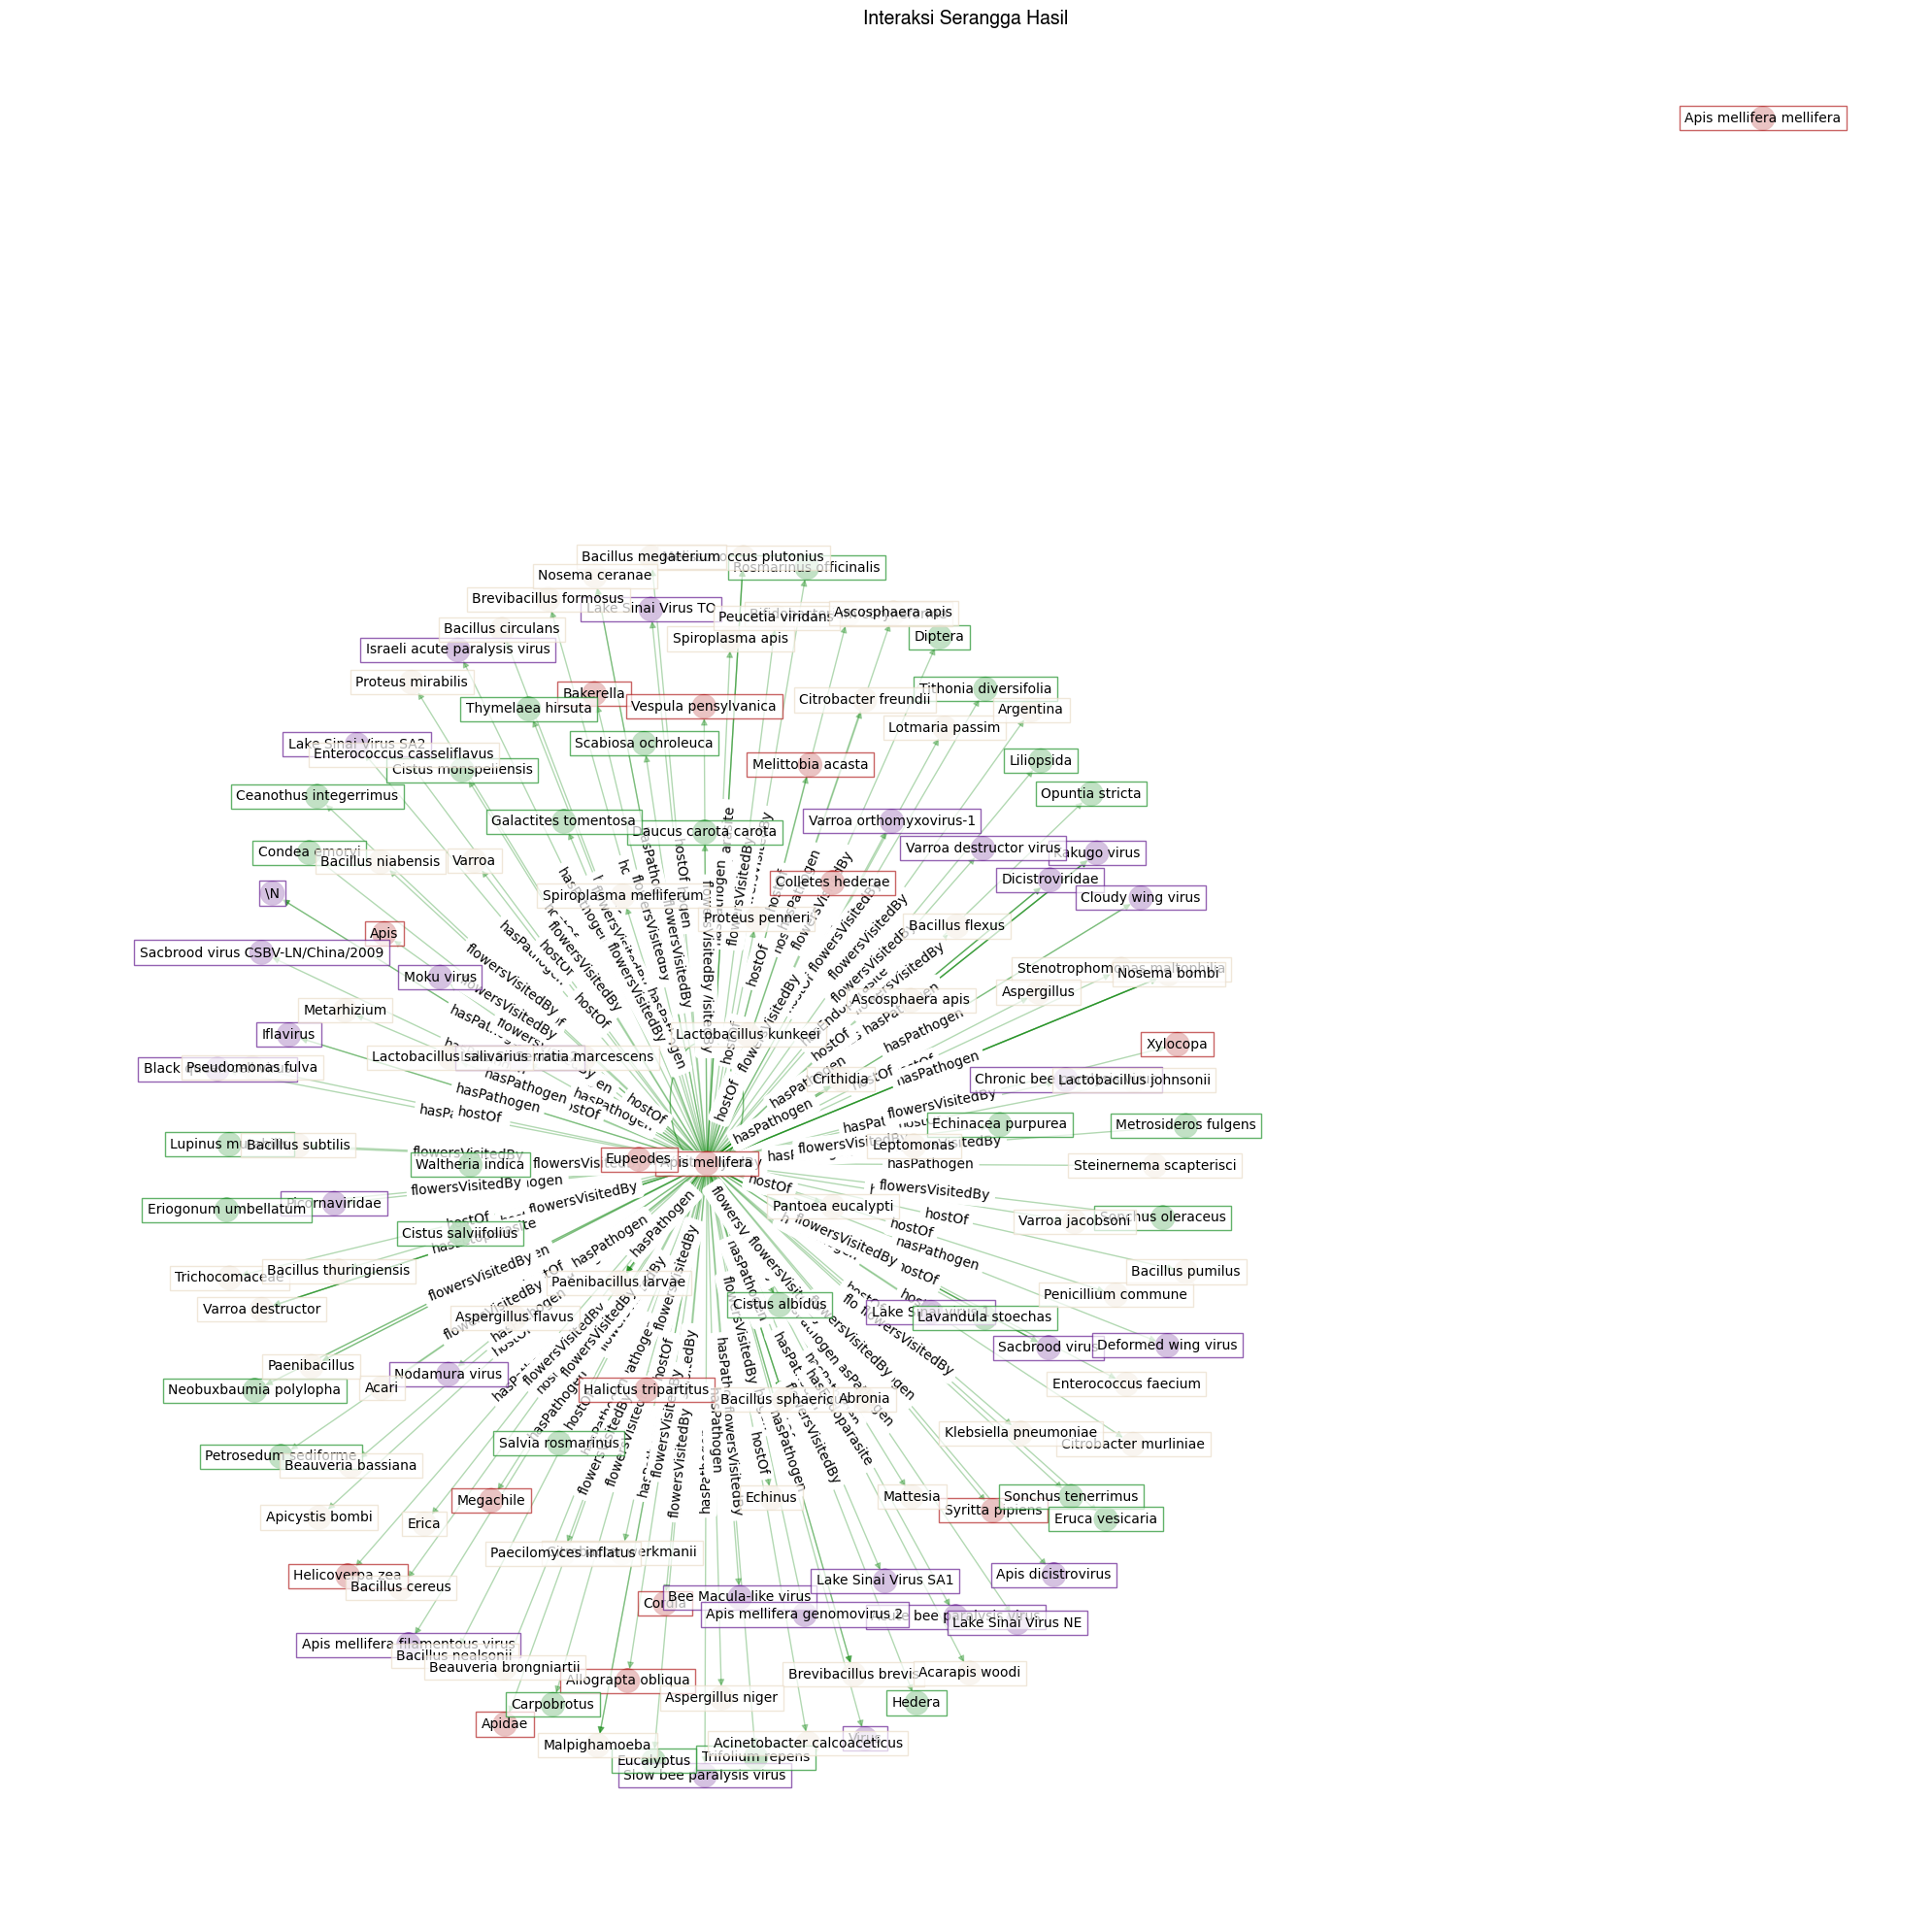

In [9]:
# cuma tampilan, visualisasi graf
G=gnx

fig, ax = plt.subplots(figsize=(20, 20))

# Generate layout for visualization
# pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato", args="")

# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='g')
nx.draw_networkx_nodes(G, pos, node_color=list(nx.get_node_attributes(G, "color").values()), alpha=0.9)

#node label
for i in ['#b22222','#671f92','#1f922b','#EADDCA']: # filtering dengan bedakan warna node
    label_options = {"ec": i, "fc": 'white', "alpha": 0.7}
    labels={nd[0]:nd[1]['label'] for nd in gnx.nodes(data=True) if nd[1]['color']==i}

    nx.draw_networkx_labels(
        nx.subgraph_view(G, filter_node=lambda n1: G.nodes(data=True)[n1].get("color", True) == i),
        pos, 
        labels=labels,
        font_size=10, 
        bbox=label_options
    )

#edge labels
edge_labels={x:i for i,x in zip(nx.get_edge_attributes(G, "label").values(),G.edges())}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


# Title/legend
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
ax.set_title("Interaksi Serangga Hasil", font)
# Change font color for legend
font["color"] = "r"

# ax.text(
#     0.80,
#     0.10,
#     "hijau = Tanaman",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )
# ax.text(
#     0.80,
#     0.08,
#     "merah = Serangga",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# ax.text(
#     0.80,
#     0.06,
#     "ungu = Virus",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# ax.text(
#     0.80,
#     0.04,
#     "abu-abu = Nogroup",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [10]:
import plotly.graph_objects as go
G=gnx
pos = nx.nx_agraph.graphviz_layout(G, prog="neato", args="")
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line= {"width":0.5, "color":'#888'},
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_colors = []
node_text = []
for node,data in G.nodes(data=True):
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_colors.append(data['color'])
    node_text.append(data['label'])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker={
        # 'showscale':True,
        # 'colorscale':'Reds',
        'reversescale':True,
        'color':[],
        'size':10,
        # 'colorbar':{
        #     # 'thickness':15,
        #     # 'title':'Node Connections',
        #     # 'xanchor':'left',
        #     # 'titleside':'right'
        # },
        'line_width':2   
    }
)
node_trace.marker.color = node_colors
node_trace.text = node_text


fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Network graph made with Python',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin={
            'b':20,'l':5,'r':5,'t':40
        },
        annotations=[{
            "text":"Insect-virus-plant",
            'showarrow':False,
            'xref':"paper", 
            'yref':"paper",
            'x':0.005, 
            'y':-0.002 
        }],
        xaxis={'showgrid':False, 'zeroline':False, 'showticklabels':False},
        yaxis={'showgrid':False, 'zeroline':False, 'showticklabels':False},
        plot_bgcolor='white',  # Set the background color of the plot
        paper_bgcolor='white'  # Set the background color of the paper 
    )
)
fig.show()

In [11]:
df_node[df_node.taxon_name.str.contains(r'\b(eretmocerus\w*|\w*eretmocerus)\b',case=False)][[
    'taxon_name','taxon_id','superkingdom','kingdom','phylum','class','order','family','genus','species'
    ]]

/var/folders/b9/v73gyxys1djbgjy3c8c3cfwm0000gn/T/ipykernel_74073/1455527824.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,taxon_name,taxon_id,superkingdom,kingdom,phylum,class,order,family,genus,species


In [12]:
gnx.nodes(data=True)['NCBI:77301']

KeyError: 'NCBI:77301'

In [47]:
# cuma tampilan
import plotly.graph_objects as go
data = df_node[df_node['taxon_id']!='NCBI:7038'] #yang bukan serangga utama
data = data.groupby(['group','color']).agg({'group': ['count'], }).reset_index().sort_values(
    ('group', 'count'),ascending=False
).reset_index(drop=True).values
labels = [i[0] for i in data]
colors = [i[1] for i in data]
slices = [i[2] for i in data]

fig = go.Figure(data=[go.Pie(labels=labels,values=slices)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=0.1)))
fig.show()

In [48]:
df_node[df_node['group']=='serangga'][['taxon_id','taxon_name','species']]

,taxon_id,taxon_name,species
3,NCBI:77301,Eretmocerus melanoscutus,EOL:844096_Eretmocerusmelanoscutus
4,NCBI:77301,Eretmocerus tejanus,EOL:844042_Eretmocerustejanus
5,NCBI:77301,Eretmocerus staufferi,EOL:844043_Eretmocerusstaufferi
6,NCBI:32399,Encarsia quaintancei,EOL:844576_Encarsiaquaintancei
7,NCBI:121805,Encarsia nigricephala,NCBI:121805_Encarsia nigricephala
...,...,...,...
108,NCBI:32399,Encarsia elegans,GBIF:1365609_Encarsiaelegans
121,NCBI:7038,Bemisia tabaci,NCBI:7038_Bemisia tabaci
122,NCBI:7037,Bemisia,None
123,NCBI:7038,Bemisia tabaci,NCBI:7038_Bemisia tabaci


# Enhancement : Wikidata

In [49]:
# wd_id='Q1303946'
wd_id=getWdId("Bemisia Tabaci")
if wd_id is None:
    print('kosong')
else:
    # getfactbox
    df_fact=getFactDict(wd_id)
    df_fact

ditemukan entitas sebanyak : 7
entitas pertama : {'id': 'Q1303946', 'title': 'Q1303946', 'pageid': 1243925, 'display': {'label': {'value': 'Silverleaf whitefly', 'language': 'en'}, 'description': {'value': 'species of insect', 'language': 'en'}}, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q1303946', 'concepturi': 'http://www.wikidata.org/entity/Q1303946', 'label': 'Silverleaf whitefly', 'description': 'species of insect', 'match': {'type': 'alias', 'language': 'en', 'text': 'Bemisia tabaci'}, 'aliases': ['Bemisia tabaci']}


### serangga kerabat

In [50]:
kerabat = getSeranggaKerabatNCBI('NCBI:7038', ncbi_ontology_url)
if(kerabat is None):
    print('kosong')
kerabat

[('Bemisia', 'genus', 'NCBI:7037'),
 ("Bemisia nr. tabaci 'Renmark'", 'species', 'NCBI:111471'),
 ('Bemisia aff. tabaci LZ-2012', 'species', 'NCBI:1168090'),
 ('Bemisia sp. LZ-2012', 'species', 'NCBI:1168091'),
 ('Bemisia sp. Unknown_Th_13_12_S.lycopersicum', 'species', 'NCBI:1775787'),
 ('Bemisia sp. Unknown_Vn_13_43_Weed', 'species', 'NCBI:1775788'),
 ('Bemisia sp. WTT-2017', 'species', 'NCBI:1974374'),
 ('Bemisia sp. BIOUG04903-G02', 'species', 'NCBI:1996894'),
 ('Bemisia sp. NS-2019', 'species', 'NCBI:2591941'),
 ('Bemisia sp. PB-2004', 'species', 'NCBI:267824'),
 ('Bemisia sp. PDB_1', 'species', 'NCBI:2704995'),
 ('Bemisia sp. PDB_2-1', 'species', 'NCBI:2704996'),
 ('Bemisia sp. PDB_2-2', 'species', 'NCBI:2704997'),
 ('Bemisia sp.', 'species', 'NCBI:2764695'),
 ('Bemisia sp. SSA1', 'species', 'NCBI:2780486'),
 ('Bemisia sp. Uganda1', 'species', 'NCBI:2780487'),
 ('Bemisia sp. 20-9 WZ-2010', 'species', 'NCBI:860381'),
 ('Bemisia sp. 55 WZ-2010', 'species', 'NCBI:860382'),
 ('Bemisi

### artikel terkait

In [51]:
# artikel
from modul.disambiguation_optimized import __querying

format_='json'
endpoint_url='https://query.wikidata.org/sparql'
query = """
SELECT ?date ?venue ?title ?url {
    ?s wdt:P921 wd:Q1303946 . # main subject about COVID-19
    { { ?s wdt:P31 wd:Q580922 } UNION { ?s wdt:P31 wd:Q13442814 } } # preprint or scholarly article
    ?s wdt:P1476 ?title .
    ?s wdt:P356 ?doi .
    BIND(IRI(CONCAT("https://doi.org/", STR(?doi))) AS ?url)
    ?s wdt:P577 ?date .
    ?s wdt:P1433 ?venueRes .
    ?venueRes wdt:P1476 ?venue .
}
"""
hasil=__querying(endpoint_url,query,format_)
kembalian=[
        (
            i['date']['value'].split('T')[0],
            i['title']['value'],
            i['venue']['value'],
            i['url']['value'].replace('https://doi.org/','doi:')
        ) 
        for i in hasil['results']['bindings']
    ]

In [52]:

df = pd.DataFrame(kembalian, columns= ['date','title','venue','url'])

In [53]:
for i in df.sort_values('date',ascending=False).reset_index(drop=True).head(12).title:
    print(i)

Isolation and molecular characterization of Cordyceps sp. from Bemisia tabaci (Hemiptera: Aleyrodidae) and pathogenic to Glycaspis brimblecombei (Hemiptera: Aphalaridae)
Bemisia tabaci MEAM1 still remains the dominant species in open field crops in Brazil
Invasion genomics uncover complex introduction patterns of the globally invasive whitefly, <i>Bemisia tabaci</i><scp>MED</scp>
Invasion genomics uncover complex introduction patterns of the globally invasive whitefly, <i>Bemisia tabaci</i><scp>MED</scp>
Genetic diversity, distribution, and structure of Bemisia tabaci whitefly species in potential invasion and hybridization regions of East Africa
Genotyping of Bemisia tabaci (Hemiptera: Aleyrodidae) affirmed a new record of Asia II 7, China 3 and dominance of Asia I cryptic species in Bihar, India
Knockdown of the Nicotinic Acetylcholine Receptor β1 Subunit Decreases the Susceptibility to Five Neonicotinoid Insecticides in Whitefly (<i>Bemisia tabaci</i>)
A single point mutation in the

### jurnal terkait

In [54]:
df.groupby('venue').count().sort_values('title',ascending=False).reset_index().head(10)

,venue,date,title,url
0,Acta Entomologica Sinica,140,140,140
1,昆虫学报,140,140,140
2,Pest Management Science,93,93,93
3,Journal of Economic Entomology,85,85,85
4,PLOS ONE,57,57,57
5,Insects,49,49,49
6,Bulletin of Entomological Research,46,46,46
7,Neotropical entomology,36,36,36
8,Neotropical Entomology,36,36,36
9,Scientific Reports,33,33,33


### Foto serangga

In [55]:
print(wd_id)
getPicture(wd_id)

Q1303946


'http://commons.wikimedia.org/wiki/Special:FilePath/Silverleaf%20whitefly.jpg'

In [56]:
# wd_id='Q1303946'
getAbstract(wd_id)

'The silverleaf whitefly (Bemisia tabaci, also informally referred to as the sweet potato whitefly) is one of several species of whitefly that are currently important agricultural pests. A review in 2011 concluded that the silverleaf whitefly is actually a species complex containing at least 40 morphologically indistinguishable species. The silverleaf whitefly thrives worldwide in tropical, subtropical, and less predominately in temperate habitats. Cold temperatures kill both the adults and the nymphs of the species. The silverleaf whitefly can be confused with other insects such as the common fruitfly, but with close inspection, the whitefly is slightly smaller and has a distinct wing color that helps to differentiate it from other insects. While the silverleaf whitefly had been known in the United States since 1896, in the mid-1980s an aggressive strain appeared in poinsettia crops in Florida. For convenience that strain was referred to as strain B (biotype B), to distinguish it from